In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [71]:
import seaborn as sns
sns.set()

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
from lightgbm import LGBMClassifier

In [19]:
from sklearn.preprocessing import LabelEncoder
# train data 입력시 id, target 모두 넣어주어야 한다. 
# test data 입력시 id 모두 넣어주어야 한다.
# from sklearn.preprocessing import LabelEncoder 해주어야 함
def submit_kaggle(df_train, df_test, model, path, user_id = "id", target = "country_destination"):
    le = LabelEncoder()

    # feature, target 전처리
    y_train = le.fit_transform(df_train[target])
    X_train = df_train.drop([target, user_id], axis = 1)

    X_test_id = df_test[user_id] # id 따로 정의
    X_test = df_test.drop([user_id], axis = 1)

    # train data set으로 fitting
    print("model fitting 시작 !!")
    model = model.fit(X_train, y_train)
    predic_proba = model.predict_proba(X_test)
    print("model fitting 완료 !!")
    
    # submit data, predict data 생성
    df_submit = pd.DataFrame(columns=["id", "country"])

    ids = []
    cts = []
    for i in range(len(X_test_id)):
        idx = X_test_id.iloc[i]
        ids += [idx] * 5
        cts += le.inverse_transform(np.argsort(predic_proba[i])[::-1])[:5].tolist()

    df_submit["id"] = ids
    df_submit["country"] = cts
    
    df_submit.to_csv(path, index = False)
    print("csv file 제작 완료 !!")
    
    !kaggle competitions submit -c airbnb-recruiting-new-user-bookings -f {path} -m "Message"

### Load_data

In [20]:
df_train = pd.read_csv("../data/train_age.csv")
df_test = pd.read_csv("../data/test_age.csv")

In [21]:
df_session = pd.read_csv("../data/sessions.csv")

### log - count

- 0.86460

In [22]:
a = df_session.groupby(["user_id"])["secs_elapsed"].count().fillna(0)
a = pd.DataFrame(a)
df_train_new = df_train.merge(a, how = "left", left_on = "id", right_index = True)

In [23]:
b = df_session.groupby(["user_id"])["secs_elapsed"].count().fillna(0)
b = pd.DataFrame(b)
df_test_new = df_test.merge(b, how = "left", left_on = "id", right_index = True)

In [24]:
df_train_new.shape, df_test_new.shape

((213451, 149), (62096, 148))

In [25]:
df_train_new = df_train_new.fillna(0)
df_test_new = df_test_new.fillna(0)

In [13]:
lgb = LGBMClassifier(max_depth=4 , n_jobs=4)

In [14]:
submit_kaggle(df_train_new, df_test_new, lgb, "submit/submit.csv")

model fitting 시작 !!
model fitting 완료 !!
csv file 제작 완료 !!
Successfully submitted to Airbnb New User Bookings

### action_type - count - all

0.87522

In [86]:
df_train_new = df_train.merge(df_session_type, how = "left", left_on = "id", right_index = True).fillna(0)
df_test_new = df_test.merge(df_session_type, how = "left", left_on = "id", right_index = True).fillna(0)

In [87]:
submit_kaggle(df_train_new, df_test_new, lgb, "submit/submit.csv")

model fitting 시작 !!
model fitting 완료 !!
csv file 제작 완료 !!
Successfully submitted to Airbnb New User Bookings

### action_type - count - click

- 0.86571

In [89]:
a = df_session.groupby(["user_id", "action_type"])["secs_elapsed"].count().fillna(0)

In [77]:
df_session_type = a.unstack().fillna(0)

In [35]:
df_session_type_click = pd.DataFrame(df_session_type["click"])

In [42]:
df_train_new = df_train.merge(df_session_type_click, how = "left", left_on = "id", right_index = True).fillna(0)
df_test_new = df_test.merge(df_session_type_click, how = "left", left_on = "id", right_index = True).fillna(0)

In [43]:
submit_kaggle(df_train_new, df_test_new, lgb, "submit/submit.csv")

model fitting 시작 !!
model fitting 완료 !!
csv file 제작 완료 !!
Successfully submitted to Airbnb New User Bookings

### action_type - count - view

0.86466

In [78]:
df_session_type_view = pd.DataFrame(df_session_type["view"])

In [79]:
df_train_new = df_train.merge(df_session_type_view, how = "left", left_on = "id", right_index = True).fillna(0)
df_test_new = df_test.merge(df_session_type_view, how = "left", left_on = "id", right_index = True).fillna(0)

In [80]:
submit_kaggle(df_train_new, df_test_new, lgb, "submit/submit.csv")

model fitting 시작 !!
model fitting 완료 !!
csv file 제작 완료 !!
Successfully submitted to Airbnb New User Bookings

### action_type - count - data

0.86476

In [81]:
df_session_type_data = pd.DataFrame(df_session_type["data"])

In [82]:
df_train_new = df_train.merge(df_session_type_data, how = "left", left_on = "id", right_index = True).fillna(0)
df_test_new = df_test.merge(df_session_type_data, how = "left", left_on = "id", right_index = True).fillna(0)

In [84]:
submit_kaggle(df_train_new, df_test_new, lgb, "submit/submit.csv")

model fitting 시작 !!
model fitting 완료 !!
csv file 제작 완료 !!
Successfully submitted to Airbnb New User Bookings

### action_type - sum - click

0.86539

In [47]:
b = df_session.groupby(["user_id", "action_type"])["secs_elapsed"].mean().fillna(0)

In [59]:
df_session_type_click = pd.DataFrame(b.unstack()["click"].fillna(0)).rename(index = str, columns = {"click" : "click_mean"})

In [60]:
df_train_new = df_train.merge(df_session_type_click, how = "left", left_on = "id", right_index = True).fillna(0)
df_test_new = df_test.merge(df_session_type_click, how = "left", left_on = "id", right_index = True).fillna(0)

In [62]:
submit_kaggle(df_train_new, df_test_new, lgb, "submit/submit.csv")

model fitting 시작 !!
model fitting 완료 !!
csv file 제작 완료 !!
Successfully submitted to Airbnb New User Bookings

### action_type EDA

In [65]:
b = df_session.groupby(["user_id", "action_type"])["secs_elapsed"].count().fillna(0)

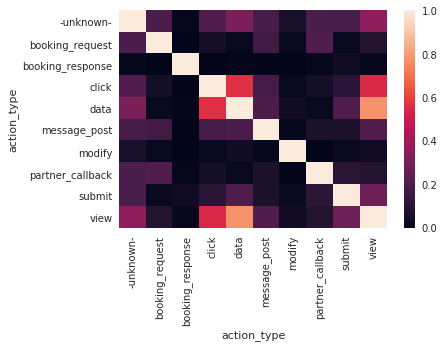

In [73]:
sns.heatmap(b.unstack().fillna(0).corr())

- data-view 서로 상관관계가 높음
- data-click, click-view 상관관계가 높음